In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium

## Read files into geopandas Dataframe

In [2]:
# Load petrol station data
stations = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/Petrol_Station/Petrol_Station/petrol_station_jakarta.shp")
print("Petrol Station Data:")
print(stations.head())
# Save petrol station data to CSV
stations.to_csv("petrol_stations.csv", index=False)

# Load probe data
probe_data = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/IDN_Q223_May23_Jakarta/Probe.shp")
print("\nProbe Data:")
print(probe_data.head())
# Save probe data to CSV
probe_data.to_csv("probe_data.csv", index=False)

# Load probe data
road_data = gpd.read_file(r"D:/GeospatialHackathon/Petrol Station Probe Data/Dataset/Data_for_hackathon/Stale_Petrol_station/Petrol_Station/Petrol_Station/road.shp")
print("\Raod Data:")
print(road_data.head())
# Save road data to CSV
road_data.to_csv("road_data.csv", index=False)

<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:17: SyntaxWarning: invalid escape sequence '\R'
C:\Users\uzmap\AppData\Local\Temp\ipykernel_17340\1852230210.py:17: SyntaxWarning: invalid escape sequence '\R'
  print("\Raod Data:")


Petrol Station Data:
  placeid           name  displaylat  displaylon                    geometry
0       1      Pertamina   -6.145160  106.894510  POINT (106.89451 -6.14516)
1       2          Shell   -6.126501  106.787652  POINT (106.78765 -6.12650)
2       3      Pertamina   -6.202623  106.806137  POINT (106.80614 -6.20262)
3       4      Pertamina   -6.311140  106.771830  POINT (106.77183 -6.31114)
4       5  Mandiri Motor   -6.197810  106.769170  POINT (106.76917 -6.19781)

Probe Data:
   WEIGHT  DIS2NT                    geometry
0       1      31  POINT (106.85278 -6.34337)
1       1     172  POINT (106.85275 -6.34469)
2       4     166  POINT (106.85276 -6.34483)
3       2     750  POINT (106.97833 -6.18029)
4       1    9999  POINT (106.86943 -6.37057)
\Raod Data:
    osm_id  code     fclass                          name   ref oneway  \
0  4705040  5113    primary             Jalan Pasar Senen  None      F   
1  4705043  5115   tertiary       Jalan Gunung Sahari III  None     

## Check for Co-ordinate systems similarity

In [3]:
print("Stations CRS:", stations.crs)
print("Probe Data CRS:", probe_data.crs)
print("Probe Data CRS:", road_data.crs)

Stations CRS: GEOGCS["GCS_WGS84_geographiques_dms",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Probe Data CRS: EPSG:4326
Probe Data CRS: EPSG:4326


In [4]:
stations = stations.to_crs(epsg=4326)
print("Updated Stations CRS:", stations.crs)
print("Probe Data CRS:", probe_data.crs)

Updated Stations CRS: EPSG:4326
Probe Data CRS: EPSG:4326


## Basic Plot of Probes & PetrolStations

C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


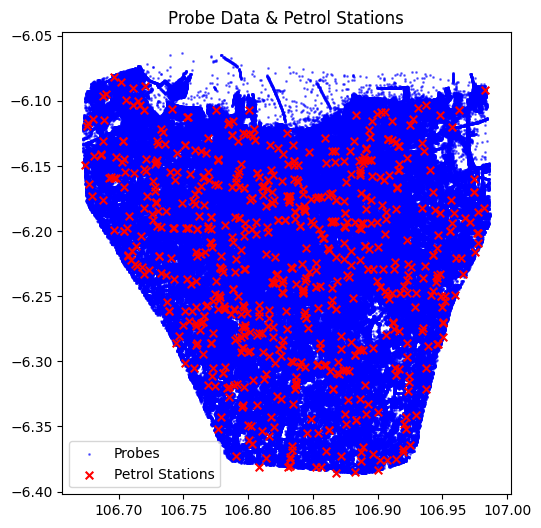

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot probe data (blue)
probe_data.plot(ax=ax, color='blue', markersize=1, alpha=0.5, label="Probes")

# Plot petrol stations (red)
stations.plot(ax=ax, color='red', markersize=30, marker="x", label="Petrol Stations")

plt.legend()
plt.title("Probe Data & Petrol Stations")
plt.show()

## Merge petrol_stations data with Probes data based on nearest geometry

In [6]:
# Print initial row counts
print(f"Initial Petrol Stations Count: {len(stations)}")
print(f"Initial Probes Count: {len(probe_data)}")

# Perform spatial join to find the nearest petrol station for each probe
probes_with_stations = gpd.sjoin_nearest(probe_data, stations, how="left", distance_col="distance_to_station")

# Print final row count
print(f"Final Combined Dataset Count: {len(probes_with_stations)}")  # Should match probes count

# Save the result
probes_with_stations.to_csv("probes_with_nearest_stations.csv", index=False)

# Display first few rows
print(probes_with_stations.head())

Initial Petrol Stations Count: 688
Initial Probes Count: 463043


c:\Users\uzmap\anaconda3\envs\pythonPractice\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Final Combined Dataset Count: 464840
   WEIGHT  DIS2NT                    geometry  index_right placeid  \
0       1      31  POINT (106.85278 -6.34337)           70      71   
1       1     172  POINT (106.85275 -6.34469)           70      71   
2       4     166  POINT (106.85276 -6.34483)           70      71   
3       2     750  POINT (106.97833 -6.18029)          235     236   
4       1    9999  POINT (106.86943 -6.37057)          395     396   

                name  displaylat  displaylon  distance_to_station  
0  Warung Bang Jamin   -6.344676  106.848766             0.004223  
1  Warung Bang Jamin   -6.344676  106.848766             0.003987  
2  Warung Bang Jamin   -6.344676  106.848766             0.003995  
3               Dodo   -6.182198  106.982084             0.004216  
4          Pertamina   -6.373070  106.872050             0.003617  


In [7]:
duplicate_probes = probes_with_stations['geometry'].duplicated(keep=False)
print(f"Duplicated probes count: {duplicate_probes.sum()}")

Duplicated probes count: 3594


In [23]:
stations.head()

,placeid,name,displaylat,displaylon,geometry
0,1,Pertamina,-6.145160,106.894510,POINT (106.89451 -6.14516)
1,2,Shell,-6.126501,106.787652,POINT (106.78765 -6.12650)
2,3,Pertamina,-6.202623,106.806137,POINT (106.80614 -6.20262)
3,4,Pertamina,-6.311140,106.771830,POINT (106.77183 -6.31114)
4,5,Mandiri Motor,-6.197810,106.769170,POINT (106.76917 -6.19781)


In [25]:
probes_with_stations.head()

,WEIGHT,DIS2NT,geometry,placeid,name,displaylat,displaylon,distance_to_station
0,1,31,POINT (106.85278 -6.34337),71,Warung Bang Jamin,-6.344676,106.848766,0.004223
1,1,172,POINT (106.85275 -6.34469),71,Warung Bang Jamin,-6.344676,106.848766,0.003987
2,4,166,POINT (106.85276 -6.34483),71,Warung Bang Jamin,-6.344676,106.848766,0.003995
3,2,750,POINT (106.97833 -6.18029),236,Dodo,-6.182198,106.982084,0.004216
4,1,9999,POINT (106.86943 -6.37057),396,Pertamina,-6.373070,106.872050,0.003617


In [26]:
probes_with_stations = probes_with_stations.to_crs(epsg=4326)
road_data = road_data.to_crs(epsg=4326)

## Merge petrol_stations & Probes merged data with Roads Data based on nearest geometry

In [ ]:
probes_with_stations_roads = gpd.sjoin_nearest(
    probes_with_stations, road_data, how="left", distance_col="distance_to_road"
)

# Save the final dataset
probes_with_stations_roads.to_csv("probes_with_stations_and_roads.csv", index=False)

# Display first few rows to verify the join
print(probes_with_stations_roads.head())

c:\Users\uzmap\anaconda3\envs\pythonPractice\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


   WEIGHT  DIS2NT                    geometry placeid          name_left  \
0       1      31  POINT (106.85278 -6.34337)      71  Warung Bang Jamin   
1       1     172  POINT (106.85275 -6.34469)      71  Warung Bang Jamin   
2       4     166  POINT (106.85276 -6.34483)      71  Warung Bang Jamin   
3       2     750  POINT (106.97833 -6.18029)     236               Dodo   
4       1    9999  POINT (106.86943 -6.37057)     396          Pertamina   

   displaylat  displaylon  distance_to_station  index_right     osm_id  code  \
0   -6.344676  106.848766             0.004223        99831  563177706  5122   
1   -6.344676  106.848766             0.003987        99787  563177637  5123   
2   -6.344676  106.848766             0.003995        99786  563177635  5123   
3   -6.182198  106.982084             0.004216        31895  328292661  5122   
4   -6.373070  106.872050             0.003617       100405  563529764  5122   

          fclass name_right   ref oneway  maxspeed  layer brid

In [28]:
probes_with_stations_roads.columns

Index(['WEIGHT', 'DIS2NT', 'geometry', 'placeid', 'name_left', 'displaylat',
       'displaylon', 'distance_to_station', 'index_right', 'osm_id', 'code',
       'fclass', 'name_right', 'ref', 'oneway', 'maxspeed', 'layer', 'bridge',
       'tunnel', 'distance_to_road'],
      dtype='object')

In [29]:
column_nan_count = probes_with_stations_roads.isnull().sum()
column_nan_count

WEIGHT                      0
DIS2NT                      0
geometry                    0
placeid                     0
name_left                   0
displaylat                  0
displaylon                  0
distance_to_station         0
index_right                 0
osm_id                      0
code                        0
fclass                      0
name_right             173820
ref                    451536
oneway                      0
maxspeed                    0
layer                       0
bridge                      0
tunnel                      0
distance_to_road            0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\uzmap\Documents\GitHub\GeospatialHackathon\Petrol Station Probe Data\probes_with_stations_and_roads.csv")

# Rename columns for clarity
df = df.rename(columns={
    "name_left": "petrol_station_name",
    "name_right": "road_name"
})

# Drop non-relevant columns
df = df.drop(['index_right','code','road_name','oneway', 'maxspeed','ref','geometry', 'osm_id', 'layer', 'bridge',"petrol_station_name"], axis=1)

df.head()

,WEIGHT,DIS2NT,placeid,displaylat,displaylon,distance_to_station,fclass,tunnel,distance_to_road
0,1,31,71,-6.344676,106.848766,0.004223,residential,F,0.000025
1,1,172,71,-6.344676,106.848766,0.003987,living_street,F,0.000054
2,4,166,71,-6.344676,106.848766,0.003995,living_street,F,0.000081
3,2,750,236,-6.182198,106.982084,0.004216,residential,F,0.000027
4,1,9999,396,-6.373070,106.872050,0.003617,residential,F,0.000004
